In [1]:
import numpy as np
import Example_matrices as ex
import dynamic_low_rank as dlr
import time_integration_low_rank as tilr
import Variable_step_size_integrator as vssi
import matplotlib.pyplot as plt

## Spørsmål

- Hvordan skal man kunne teste dlr?
    - hva slags A skal det fungere på
    - testing av Fu, gir matrise med elementer på størrelse $10^{-16}$  
    - (ekstra) hvordan ser man at B = CD.T
    - ks2 blir ikke brukt i time_integration_low_rank
    - hva slags A matise skal vi bruke i 3
    
<br>

- Variable solver er litt rar.
    - kan ikke konvergere da steglengden kun minkes.

In [2]:
# testing av Fu med dlr implementasjon

A = ex.A(0, epsilon = 1/2)
A_dot = ex.A_dot(0, epsilon = 1/2)

k = 10

U, S, V = vssi.construct_U_S_V_0_k(k,A)

# test av Fu
FUJ = dlr.FU(U,A_dot,V,S)


In [3]:
# test av variable step size integrator for dynamic low rank

t = 1.1
h = 1
tol = 10
k = 100
tf = 0.8

A = ex.A(0, epsilon = 1/2)
A_dot = ex.A_dot(0, epsilon = 1/2)

Y,j = vssi.variable_solver(0,tf,A,tol,h,dlr.second_order_method,k)
Yt = vssi.format_result(A_dot,Y)

print(np.linalg.norm(Yt[-1,:,:]-A,'fro'))




23.9346293574308


In [12]:
def g(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)

def u_exact(x,y,t):
    return np.exp(-5*np.pi**2*t)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

x = np.linspace(0,1,10)
y = np.linspace(0,1,10)
X,Y = np.meshgrid(x,y)
t = 0

u = u_exact(X,Y,t)


In [17]:

tol = 0.01
t0 = 0
tf = 1
h = 1

k = 10
m,n = 10,10

u0 = tilr.u_fun(g,m,n) # u0

u_dot = tilr.u_dot_fun(g,m,n)
method = tilr.second_order_method

Y,j = vssi.variable_solver(t0,tf,u0,tol,h,method,k)

Yt = vssi.format_result(u_dot,Y)
print(np.linalg.norm(Yt[0,:,:]-u))


4.499999999999999


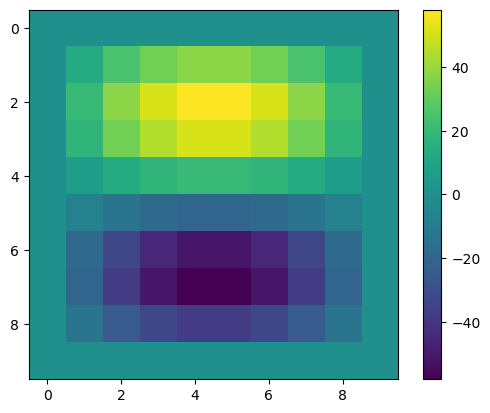

In [20]:
plt.imshow(Yt[-1,:,:])
plt.colorbar()